# New Inference

In [1]:
!pip install "jax[cuda12_pip]==0.4.23" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html

Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.6 MB/s eta 0:00:00
  Using cached nv

In [ ]:
!git  clone https://github.com/rohitgandikota/sliders.git
!cd sliders
!pip install -r sliders/requirements.txt
!pip install accelerate
import os
# os.chdir('sliders')
# !wget https://sliders.baulab.info/weights/xl_sliders/muscular.pt

Cloning into 'sliders'...
remote: Enumerating objects: 407, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 407 (delta 156), reused 113 (delta 113), pack-reused 224
Receiving objects: 100% (407/407), 31.30 MiB | 23.24 MiB/s, done.
Resolving deltas: 100% (220/220), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.1/989.1 kB 30.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.7/761.7 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 98.0 

In [ ]:
!wget https://sliders.baulab.info/weights/sd14_sliders/chubby_sd14.pt

--2024-04-26 20:10:19--  https://sliders.baulab.info/weights/sd14_sliders/chubby_sd14.pt
Resolving sliders.baulab.info (sliders.baulab.info)... 35.232.255.106
Connecting to sliders.baulab.info (sliders.baulab.info)|35.232.255.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6025989 (5.7M)
Saving to: ‘chubby_sd14.pt’

chubby_sd14.pt      100%[===================>]   5.75M  17.4MB/s    in 0.3s    

2024-04-26 20:10:20 (17.4 MB/s) - ‘chubby_sd14.pt’ saved [6025989/6025989]



In [ ]:
!wget https://sliders.baulab.info/weights/sd14_sliders/smiling_sd14.pt

--2024-04-26 20:10:20--  https://sliders.baulab.info/weights/sd14_sliders/smiling_sd14.pt
Resolving sliders.baulab.info (sliders.baulab.info)... 35.232.255.106
Connecting to sliders.baulab.info (sliders.baulab.info)|35.232.255.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6026893 (5.7M)
Saving to: ‘smiling_sd14.pt’

smiling_sd14.pt     100%[===================>]   5.75M  16.6MB/s    in 0.3s    

2024-04-26 20:10:21 (16.6 MB/s) - ‘smiling_sd14.pt’ saved [6026893/6026893]



In [ ]:
import torch
from PIL import Image
import argparse
import os, json, random
import pandas as pd
import matplotlib.pyplot as plt
import glob, re

from tqdm.notebook import tqdm
import numpy as np

from safetensors.torch import load_file
import matplotlib.image as mpimg
import copy
import gc
from transformers import CLIPTextModel, CLIPTokenizer

import diffusers
from diffusers import DiffusionPipeline
from diffusers import AutoencoderKL, DDPMScheduler, DiffusionPipeline, UNet2DConditionModel, LMSDiscreteScheduler
from diffusers.loaders import AttnProcsLayers
from diffusers.models.attention_processor import LoRAAttnProcessor, AttentionProcessor
from typing import Any, Dict, List, Optional, Tuple, Union
from trainscripts.textsliders.lora import LoRANetwork, DEFAULT_TARGET_REPLACE, UNET_TARGET_REPLACE_MODULE_CONV

In [ ]:
from transformers import AutoTokenizer

In [ ]:
def flush():
    torch.cuda.empty_cache()
    gc.collect()
flush()
width = 512
height = 512
steps = 50
cfg_scale = 7.5

# del ldm_stable
flush()

In [ ]:
pretrained_model_name_or_path = "CompVis/stable-diffusion-v1-4"

revision = None
device = 'cuda:0'
rank = 4
weight_dtype = torch.float16


# Load scheduler, tokenizer and models.
noise_scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)
tokenizer = CLIPTokenizer.from_pretrained(
    pretrained_model_name_or_path, subfolder="tokenizer", revision=revision
)
text_encoder = CLIPTextModel.from_pretrained(
    pretrained_model_name_or_path, subfolder="text_encoder", revision=revision
)
vae = AutoencoderKL.from_pretrained(pretrained_model_name_or_path, subfolder="vae", revision=revision)
unet = UNet2DConditionModel.from_pretrained(
    pretrained_model_name_or_path, subfolder="unet", revision=revision
)

# freeze parameters of models to save more memory
unet.requires_grad_(False)
unet.to(device, dtype=weight_dtype)
vae.requires_grad_(False)

text_encoder.requires_grad_(False)

# For mixed precision training we cast all non-trainable weigths (vae, non-lora text_encoder and non-lora unet) to half-precision
# as these weights are only used for inference, keeping weights in full precision is not required.


# Move unet, vae and text_encoder to device and cast to weight_dtype
vae.requires_grad_(False)
vae.to(device, dtype=weight_dtype)
text_encoder.to(device, dtype=weight_dtype)

In [ ]:
cd ../sliders

In [ ]:
slider1 = 'smiling_sd14.pt'

train_method = 'noxattn'
network_type = "c3lier"
if train_method == 'xattn':
    network_type = 'lierla'

modules = DEFAULT_TARGET_REPLACE
if network_type == "c3lier":
    modules += UNET_TARGET_REPLACE_MODULE_CONV
import os
model_name = slider1

name = os.path.basename(model_name)
alpha = 1.0
# freeze parameters of models to save more memory
unet.requires_grad_(False)
unet.to(device, dtype=weight_dtype)
network1 = LoRANetwork(
        unet,
        rank=4,
        multiplier=1.0,
        alpha=alpha,
        train_method=train_method,
    ).to(device, dtype=weight_dtype)
network1.load_state_dict(torch.load(slider1))

torch_device = device
negative_prompt = None
batch_size = 1
height = 512
width = 512
ddim_steps = 50
guidance_scale = 7.5

In [ ]:
image_list = []
latent_finals = []
scale_factor_finals = []

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd ..

/content/drive/.shortcut-targets-by-id/1sRNTtpIL4dfHDH9diFcz8AunTk4oXAG3/PGM Data


In [ ]:
cd 'drive/MyDrive/PGM Data/chubby_results'

In [ ]:
cd 'chubby_results'

/content/drive/.shortcut-targets-by-id/1sRNTtpIL4dfHDH9diFcz8AunTk4oXAG3/PGM Data/chubby_results


In [ ]:
cd '../chubby_results'

/content/drive/.shortcut-targets-by-id/1sRNTtpIL4dfHDH9diFcz8AunTk4oXAG3/PGM Data/chubby_results


In [ ]:
with torch.no_grad():
  x_t8 = torch.load('x_t_chubby_man_8.pt').to(device).half()
  x_t0 = torch.load('x_t_chubby_man_0.pt').to(device).half()
  ue8 = torch.load('ucond_embeddings_chubby_man_8.pt')
  ue0 = torch.load('ucond_embeddings_chubby_man_0.pt')
  latent_x_primes = torch.load('latent_x_primes.pt')[-1].to(device).half()
  # cb3 = torch.load('chubby_three_text_embeddings.pt')
  # cb0 = torch.load('chubby_zero_text_embeddings.pt')
  cb_in_text_vec = []
  for i in range(50):
    cb_in_text_vec.append(ue8[i].to(device).half() - ue0[i].to(device).half())

In [ ]:
cd '../sliders'

/content/drive/.shortcut-targets-by-id/1sRNTtpIL4dfHDH9diFcz8AunTk4oXAG3/PGM Data/sliders


In [ ]:
seed = 42
prompt = "digital illustration of kid looking at camera"

<ipython-input-70-702969f3258d>:15: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  latents = torch.randn((batch_size, unet.in_channels, height // 8, width // 8),generator=generator,)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

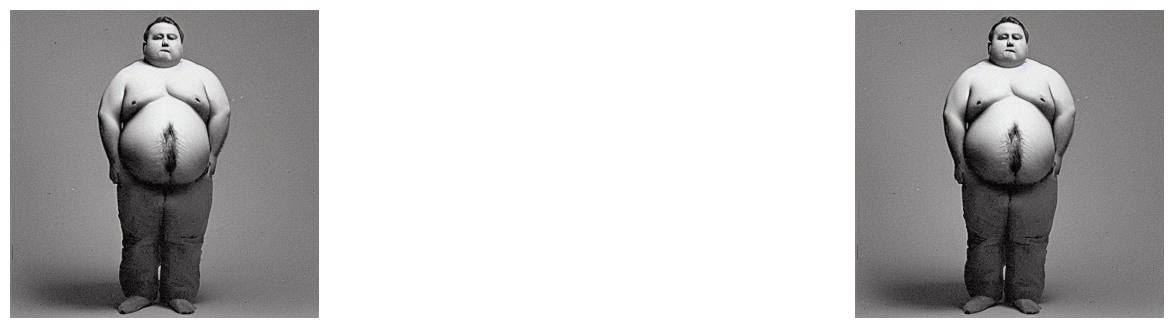

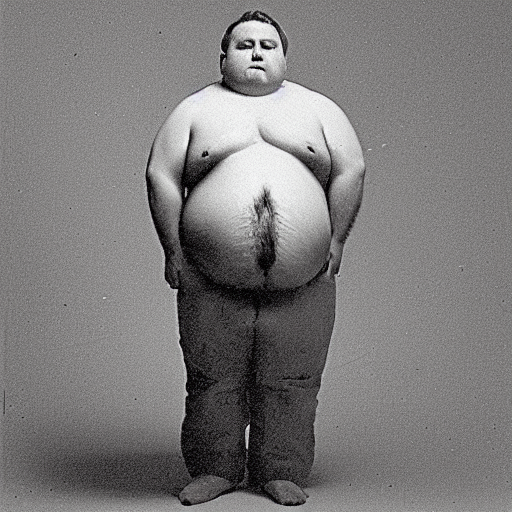

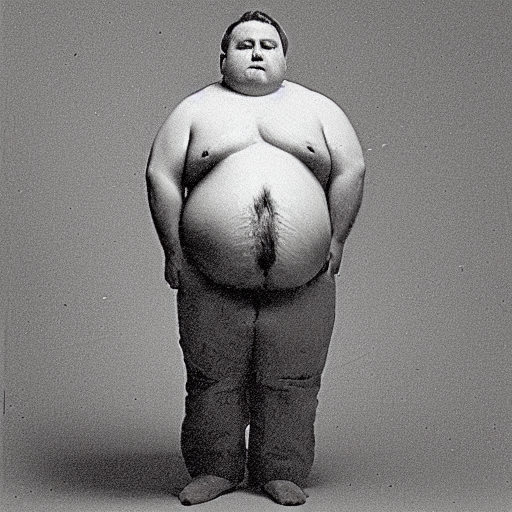

In [ ]:
scales1 = [0, 1]
start_noise = 500 # use smaller values for real image editing so that the identity does not change

images_list = []
for scale1 in scales1:
    generator = torch.manual_seed(seed)

    text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")

    text_embeddings_ = text_encoder(text_input.input_ids.to(torch_device))[0]


    max_length = text_input.input_ids.shape[-1]

    latents = torch.randn((batch_size, unet.in_channels, height // 8, width // 8),generator=generator,)
    latents = latents.to(torch_device)



    uncond_input = tokenizer([""] * batch_size, padding="max_length", max_length=max_length, return_tensors="pt")
    uncond_embeddings = text_encoder(uncond_input.input_ids.to(torch_device))[0]


    # cb3 = cb.copy()
    for i in range(50):
      #cb_in_text_vec[i] = cb_in_text_vec[i] * -1
      cb_in_text_vec[i] += uncond_embeddings


    # print('made it here')
    noise_scheduler.set_timesteps(ddim_steps)

    # save latents
    # latents = x_t8 - x_t0 + latent_x_primes
    latents = latent_x_primes
    latents = latents * noise_scheduler.init_noise_sigma
    latents = latents.to(weight_dtype)

    cnt = -1
    for t in tqdm(noise_scheduler.timesteps):
        cnt+=1
        if t>start_noise:
            network1.set_lora_slider(scale=0)
        else:
            network1.set_lora_slider(scale=scale1)

        text_embeddings = torch.cat([cb_in_text_vec[cnt].expand(*text_embeddings_.shape), text_embeddings_])
        # text_embeddings = torch.cat([uncond_embeddings, text_embeddings_])
        # expand the latents if we are doing classifier-free guidance to avoid doing two forward passes.
        latent_model_input = torch.cat([latents] * 2)
        text_embeddings = text_embeddings.to(weight_dtype)
        latent_model_input = noise_scheduler.scale_model_input(latent_model_input, timestep=t)
        # predict the noise residual

        with torch.no_grad():
            with network1:
                noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample
        # perform guidance
        noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
        noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

        # compute the previous noisy sample x_t -> x_t-1
        latents = noise_scheduler.step(noise_pred, t, latents).prev_sample

    # scale and decode the image latents with vae
    latents = 1 / 0.18215 * latents
    with torch.no_grad():
        image = vae.decode(latents).sample
    image = (image / 2 + 0.5).clamp(0, 1)
    image = image.detach().cpu().permute(0, 2, 3, 1).to(torch.float16).numpy()
    images = (image * 255).round().astype("uint8")
    pil_images = [Image.fromarray(image) for image in images]
    images_list.append(pil_images[0])

fig, ax = plt.subplots(1, len(images_list), figsize=(20,4))
for i, a in enumerate(ax):
    a.imshow(images_list[i])
    a.axis('off')


plt.show()

for im in images_list:
    display(im)

In [ ]:
type(image_list[0])

numpy.ndarray

In [ ]:
from PIL import Image
for arr in range(len(image_list)):
  im = Image.fromarray(np.squeeze(image_list[arr]))
  im.save(f"man_chubby_{arr}.png")

In [ ]:
ls ../drive

MyDrive/


In [ ]:
cd chubby_results

/content/drive/.shortcut-targets-by-id/1sRNTtpIL4dfHDH9diFcz8AunTk4oXAG3/PGM Data/chubby_results


In [ ]:
mkdir chubby_results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
type(latent_finals[0])

torch.Tensor

In [ ]:
torch.save(latent_finals, 'chubby_latent_finals.pt')

In [ ]:
scale_factor_finals

[5.489980785067252, 5.489980785067252, 5.489980785067252, 5.489980785067252]

In [ ]:
torch.save(scale_factor_finals, 'scale_factor_finals.pt')